# Homework Assignment  5

**Question 1:** Select a directed network, and develop a simple
    link prediction classifier based on the network's directed topology (40pt). 
    Use node or link embedding features and try to improve the classification (20pt)
    
**Bonus:** Evaluate the classifier's ability to predict future links (10pt)
    
** Note:** You can use [Reddit community networks](http://dynamics.cs.washington.edu/data.html), or search
for networks using [The Colorado Index of Complex Networks](https://icon.colorado.edu/).

In [1]:
!mkdir ./datasets/

In [2]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 64kB/s 
     |████████████████████████████████| 86.4MB 62kB/s 
     |████████████████████████████████| 327kB 42.7MB/s 
     |████████████████████████████████| 3.5MB 24.0MB/s 
     |████████████████████████████████| 3.6MB 32.1MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 450kB 48.2MB/s 
     |████████████████████████████████| 3.8MB 42.2MB/s 
     |████████████████████████████████| 18.3MB 137kB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=b91b0a9d1ef26820255d731b7148dd6ac4531572138dafb74d0d453c370eb174
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=06a05a5e9d08f1c5b15246cc54f81fdeb28fe895b602c972e911d6c9402fa744
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb5951

In [3]:
!mkdir ./datasets/AnalyzingBigData_Ass5/
!wget http://dynamics.cs.washington.edu/nobackup/reddit/NBA2k.tar.gz -O ./datasets/AnalyzingBigData_Ass5/NBA2k.tar.gz

--2021-04-24 07:00:58--  http://dynamics.cs.washington.edu/nobackup/reddit/NBA2k.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58619414 (56M) [application/x-gzip]
Saving to: ‘./datasets/AnalyzingBigData_Ass5/NBA2k.tar.gz’

./datasets/Analyzin 100%[===================>]  55.90M  55.4MB/s    in 1.0s    

2021-04-24 07:01:00 (55.4 MB/s) - ‘./datasets/AnalyzingBigData_Ass5/NBA2k.tar.gz’ saved [58619414/58619414]



In [4]:
!tar -xf ./datasets/AnalyzingBigData_Ass5/NBA2k.tar.gz -C ./datasets/AnalyzingBigData_Ass5/
!ls ./datasets/AnalyzingBigData_Ass5/

metadata.json			    NBA2k.2010-12-13.2014-02-03.sgraph
NBA2k.2010-12-13.2011-01-10.sgraph  NBA2k.2010-12-13.2014-03-03.sgraph
NBA2k.2010-12-13.2011-02-07.sgraph  NBA2k.2010-12-13.2014-03-31.sgraph
NBA2k.2010-12-13.2011-03-07.sgraph  NBA2k.2010-12-13.2014-04-28.sgraph
NBA2k.2010-12-13.2011-04-04.sgraph  NBA2k.2010-12-13.2014-05-26.sgraph
NBA2k.2010-12-13.2011-05-02.sgraph  NBA2k.2010-12-13.2014-06-23.sgraph
NBA2k.2010-12-13.2011-05-30.sgraph  NBA2k.2010-12-13.2014-07-21.sgraph
NBA2k.2010-12-13.2011-06-27.sgraph  NBA2k.2010-12-13.2014-08-18.sgraph
NBA2k.2010-12-13.2011-07-25.sgraph  NBA2k.2010-12-13.2014-09-15.sgraph
NBA2k.2010-12-13.2011-08-22.sgraph  NBA2k.2010-12-13.2014-10-13.sgraph
NBA2k.2010-12-13.2011-09-19.sgraph  NBA2k.2010-12-13.2014-11-10.sgraph
NBA2k.2010-12-13.2011-10-17.sgraph  NBA2k.2010-12-13.2014-12-08.sgraph
NBA2k.2010-12-13.2011-11-14.sgraph  NBA2k.2010-12-13.2015-01-05.sgraph
NBA2k.2010-12-13.2011-12-12.sgraph  NBA2k.2010-12-13.2015-02-02.sgraph
NBA2k.2010-12-13.2012-

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import turicreate as tc 

sg = tc.load_sgraph('./datasets/AnalyzingBigData_Ass5/NBA2k.2010-12-13.2014-04-28.sgraph')

In [6]:
g = nx.Graph()
g.add_edges_from([(e['__src_id'],e['__dst_id']) for e in sg.edges])
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 6215
Number of edges: 24851
Average degree:   7.9971


In [7]:
# This is for predicting missing links scenario
import random 

def select_random_existing_links(g, n):
    l =list(g.edges())
    random.shuffle(l)
    return l[:n]
postive_links = select_random_existing_links(g,10000)

In [8]:
def get_random_friend_of_friend(g, v, max_tries=100):
    for i in range(max_tries):
        if len(list(g.neighbors(v)))==0:
          continue
        u = random.choice(list(g.neighbors(v)))
        if len(list(g.neighbors(u)))==0:
          continue
        x = random.choice(list(g.neighbors(u)))
        if not g.has_edge(v,x):
            return x
    return None
    
def select_random_non_existing_links_distance_2(g, n):
    select_links = set()
    v_list = list(g.nodes())
    while len(select_links) < n:
        v = random.choice(v_list)
        u = get_random_friend_of_friend(g, v)
        if u is None:
            continue
        select_links.add((v,u))
    return list(select_links)

negative_links = select_random_non_existing_links_distance_2(g, 10000)
len(negative_links)

10000

In [9]:
from tqdm import tqdm_notebook as tqdm 
import operator

def find_friends_of_friends(g, v):
    "Returns a set with all the friends of friends of v that are not friends of v"
    friends_set = set(g.neighbors(v))
    friends_of_friends_set = set()
    for f in friends_set:
        friends_of_friends_set |= set(g.neighbors(f))
    friends_of_friends_set -= friends_set
    friends_of_friends_set -= {v}
    return friends_of_friends_set

def friends_measure(g, u,v):
    s = 0
    for x in find_friends_of_friends(g,u):
        for y in find_friends_of_friends(g,v):
            if g.has_edge(x,y) or x == y:
                s += 1
    return s

def total_friends(g, u, v):   
    return len(set(g.neighbors(v)) | set(g.neighbors(u)))

def common_friends(g,u,v):
    if not g.has_node(u) or not g.has_node(v):
        return None
    return set(g.neighbors(u)) & set(g.neighbors(v))

def get_features_dict(g,u, v):
    removed_edge = False
    if g.has_edge(u,v):
        g.remove_edge(u,v) #  remove edge before feature calculation
        removed_edge = True
    try:
        d = {
            'degree_v': len(list(g.neighbors(v))),
            'degree_u': len(list(g.neighbors(u))),
            'total_friends': total_friends(g,u,v),
            'common_friends': len(common_friends(g,u,v)),
            'jaccard_coefficient': list(nx.jaccard_coefficient(g,[(u,v)]))[0][2],
            'adamic_adar_index': list(nx.adamic_adar_index(g,[(u,v)]))[0][2],
            'friends_measure': friends_measure(g, u,v)
        }
    except:
        if removed_edge:
            g.add_edge(u,v) # return the edge back to the graph
        return None

    
    if removed_edge:
        g.add_edge(u,v) # return the edge back to the graph
    return d

def get_features_dict(g,u, v):
    removed_edge = False
    if g.has_edge(u,v):
        g.remove_edge(u,v) #  remove edge before feature calculation
        removed_edge = True
    try:
        d = {
            'degree_v': len(list(g.neighbors(v))),
            'degree_u': len(list(g.neighbors(u))),
            'total_friends': total_friends(g,u,v),
            'common_friends': len(common_friends(g,u,v)),
            'jaccard_coefficient': list(nx.jaccard_coefficient(g,[(u,v)]))[0][2],
            'adamic_adar_index': list(nx.adamic_adar_index(g,[(u,v)]))[0][2],
            'friends_measure': friends_measure(g, u,v)
        }
    except:
        if removed_edge:
            g.add_edge(u,v) # return the edge back to the graph
        return None

    
    if removed_edge:
        g.add_edge(u,v) # return the edge back to the graph
    return d

In [10]:
links_features = []

for i in tqdm(range(len(postive_links))):    
    u,v = postive_links[i]
    d = get_features_dict(g, u,v )
    if d is None:
        continue
    d['class'] = True
    links_features.append(d)

for i in tqdm(range(len(negative_links))):    
    u,v = negative_links[i]
    d = get_features_dict(g, u,v )
    if d is None:
        continue
    d['class'] = False
    links_features.append(d)
links_features[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


{'adamic_adar_index': 0,
 'class': True,
 'common_friends': 0,
 'degree_u': 10,
 'degree_v': 1,
 'friends_measure': 520,
 'jaccard_coefficient': 0.0,
 'total_friends': 11}

In [11]:
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure', 'class' ]
data_dict = {f:[] for f in features_list}
 

for d in links_features:
    for feature in features_list:
        data_dict[feature].append(d[feature])
sf = tc.SFrame(data_dict)
sf

adamic_adar_index,class,common_friends,degree_u,degree_v,friends_measure,jaccard_coefficient,total_friends
0.0,1,0,10,1,520,0.0,11
0.0,1,0,30,1,3026,0.0,31
0.3396232718951086,1,1,22,29,8240,0.02,50
0.20609929155556622,1,1,33,2,2879,0.029411764705882353,34
0.0,1,0,20,2,1578,0.0,22
0.0,1,0,17,1,1464,0.0,18
1.388307154657715,1,6,25,65,10575,0.07142857142857142,84
0.5264488409841683,1,2,49,10,9393,0.03508771929824561,57
0.0,1,0,46,7,5834,0.0,53
1.027766035575763,1,5,33,42,12653,0.07142857142857142,70


In [12]:
test, train  = sf.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['degree_v', 'degree_u', 'total_friends', 'common_friends', 'jaccard_coefficient', 'adamic_adar_index', 'friends_measure' ]
cls = tc.classifier.create(train,features=features_list, target="class")

Train size 15618
Test size: 3867
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 14837

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.021919     | 0.914740          | 0.888604            | 0.503653          | 0.511608            |

| 2         | 0.040173     | 0.915414          | 0.895006            | 0.398619          | 0.410607            |

| 3         | 0.063732     | 0.915953          | 0.896287            | 0.333292          | 0.351306            |

| 4         | 0.083097     | 0.918784          | 0.897567            | 0.290201          | 0.311826            |

| 5         | 0.103150     | 0.918986          | 0.896287            | 0.261456          | 0.286461            |

| 10        | 0.186796     | 0.921750          | 0.896287            | 0.202800          | 0.237275            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 14837

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.023939     | 0.905911          | 0.871959            | 0.294012          | 0.335139            |

| 2         | 0.041282     | 0.907731          | 0.884763            | 0.290289          | 0.326511            |

| 3         | 0.060316     | 0.912786          | 0.882202            | 0.283826          | 0.318440            |

| 4         | 0.076928     | 0.910831          | 0.887324            | 0.285145          | 0.318955            |

| 5         | 0.094074     | 0.910022          | 0.886044            | 0.285867          | 0.320846            |

| 10        | 0.174539     | 0.915279          | 0.888604            | 0.280236          | 0.312441            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 14837

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.028097     | 0.914740          | 0.888604            | 0.277654          | 0.304464            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 14837

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.035045     | 0.635506          | 0.627401            |

| 1         | 4        | 1.000000  | 0.061547     | 0.778594          | 0.745198            |

| 2         | 5        | 1.000000  | 0.076692     | 0.804947          | 0.781050            |

| 3         | 6        | 1.000000  | 0.094876     | 0.801173          | 0.782330            |

| 4         | 7        | 1.000000  | 0.115413     | 0.815798          | 0.797695            |

| 9         | 12       | 1.000000  | 0.175639     | 0.870324          | 0.841229            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 14837

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients      : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.059771     | 0.768686          | 0.756722            |

| 2         | 3        | 0.082514     | 0.803801          | 0.778489            |

| 3         | 4        | 0.100990     | 0.842286          | 0.819462            |

| 4         | 5        | 0.120824     | 0.874570          | 0.846351            |

| 5         | 6        | 0.141137     | 0.891285          | 0.869398            |

| 7         | 8        | 0.179348     | 0.893105          | 0.870679            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8962868117797695
PROGRESS: RandomForestClassifier          : 0.8886043533930857
PROGRESS: DecisionTreeClassifier          : 0.8860435339308579
PROGRESS: SVMClassifier                   : 0.8412291933418694
PROGRESS: LogisticClassifier              : 0.8706786171574904
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [13]:
cls

Class                          : BoostedTreesClassifier

Schema
------
Number of examples             : 14837
Number of feature columns      : 7
Number of unpacked features    : 7
Number of classes              : 2

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.1873
Training accuracy              : 0.9217
Validation accuracy            : 0.8963
Training log_loss              : 0.2028
Validation log_loss            : 0.2373
Training auc                   : 0.9779
Validation auc                 : 0.9686

In [14]:
results = cls.evaluate(test)
results

{'accuracy': 0.9118179467287303,
 'auc': 0.9725101988951748,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  147  |
 |      1       |        1        |  1803 |
 |      0       |        1        |  194  |
 |      0       |        0        |  1723 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9136052698251836,
 'log_loss': 0.21931131426680306,
 'precision': 0.9028542814221332,
 'recall': 0.9246153846153846,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 1950 | 1917 |
 |   0.001   | 1.0 | 1.0 | 1950 | 1917 |
 |   0.002   | 1.0 |

### improve model by node embbeding

In [15]:
l =  zip(g.nodes(), range(len(g.nodes())))
l = list(l)
l[:10]

[('QFDRKF', 0),
 ('thisismyusernam', 1),
 ('Fillmoe', 2),
 ('byzas', 3),
 ('atm0', 4),
 ('tsuxiittrd', 5),
 ('kensation4112', 6),
 ('DyGr', 7),
 ('H_SIZZLE', 8),
 ('mikesweeneyy', 9)]

In [16]:
nodes_dict = dict(l)
r_node_dict = {v:k for k,v in nodes_dict.items()}
list(r_node_dict.items())[:10]

[(0, 'QFDRKF'),
 (1, 'thisismyusernam'),
 (2, 'Fillmoe'),
 (3, 'byzas'),
 (4, 'atm0'),
 (5, 'tsuxiittrd'),
 (6, 'kensation4112'),
 (7, 'DyGr'),
 (8, 'H_SIZZLE'),
 (9, 'mikesweeneyy')]

In [17]:
h = nx.Graph()
for e1,e2 in g.edges():
  h.add_edge(nodes_dict[e1], nodes_dict[e2])
print(nx.info(g))
print(nx.info(h))

Name: 
Type: Graph
Number of nodes: 6215
Number of edges: 24851
Average degree:   7.9971
Name: 
Type: Graph
Number of nodes: 6215
Number of edges: 24851
Average degree:   7.9971


In [18]:
!pip install karateclub

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 1.8MB 10.3MB/s 
     |████████████████████████████████| 24.2MB 2.0MB/s 
  Created wheel for karateclub: filename=karateclub-1.0.24-cp37-none-any.whl size=94202 sha256=eedc636b0697a490344c58483543aa53278de218e9f7f890e66243374579fa44
  Stored in directory: /root/.cache/pip/wheels/ab/a4/81/a2761ff51bb1caa318e69e4a30f5d7d39c14f10efe73365279
Successfully built karateclub
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [20]:
import karateclub

model = karateclub.DeepWalk()
model.allow_disjoint = True
model.fit(h)
embedding = model.get_embedding()
embedding

array([[-0.78399384,  0.26018575,  0.35792375, ..., -0.17071928,
         0.6678421 , -0.19837515],
       [-0.4564789 , -0.32610846,  0.7031052 , ...,  0.43313947,
         0.7985274 ,  0.5547119 ],
       [-0.8583492 , -1.1608394 , -0.23165254, ...,  2.0262446 ,
        -0.56119305, -1.3487757 ],
       ...,
       [ 0.03209827, -0.04748394,  0.20235007, ...,  0.05759469,
        -0.11696117,  0.05766116],
       [ 0.03794564, -0.06759401,  0.15433311, ...,  0.04687363,
        -0.24300604,  0.10256889],
       [ 0.31787184,  0.30690432, -1.2999061 , ...,  0.67905885,
        -0.14005059, -1.2734612 ]], dtype=float32)

In [40]:
def get_features_emb_dict(g,u, v):
    removed_edge = False
    if g.has_edge(u,v):
        g.remove_edge(u,v) #  remove edge before feature calculation
        removed_edge = True
    try:
        d = {
            'u': embedding[nodes_dict[u]],
            'v': embedding[nodes_dict[v]]
        }
    except Exception as e:
      print(e)
      if removed_edge:
          g.add_edge(u,v) # return the edge back to the graph
      return None

    
    if removed_edge:
        g.add_edge(u,v) # return the edge back to the graph
    return d

In [41]:
links_emb_features = []

for i in tqdm(range(len(postive_links))):    
    u,v = postive_links[i]
    d = get_features_emb_dict(g, u,v )
    if d is None:
        continue
    d['class'] = True
    links_emb_features.append(d)

for i in tqdm(range(len(negative_links))):    
    u,v = negative_links[i]
    d = get_features_emb_dict(g, u,v )
    if d is None:
        continue
    d['class'] = False
    links_emb_features.append(d)
links_emb_features[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


{'class': True,
 'u': array([ 1.2628142 , -0.10187961, -2.1470203 , -0.6177724 ,  0.56131834,
        -1.6382647 ,  0.6724786 ,  1.4022112 ,  0.32370782, -0.7971643 ,
         1.468613  ,  1.2954324 ,  0.06100417, -0.8355794 , -0.53681177,
        -0.16820258, -0.63587326,  1.8021477 , -0.9718804 , -0.04168382,
         0.84935206, -1.0550367 , -0.59736395,  1.2593329 , -1.6253488 ,
         0.50164014,  0.7278639 ,  0.74639493,  1.4455475 , -1.1462744 ,
         0.42683482, -1.658995  , -1.2784263 , -1.0134367 ,  0.00488487,
         1.3305482 ,  1.5812123 , -0.44263706, -1.2759429 ,  0.567666  ,
        -2.3765502 , -0.61715734,  0.4091544 ,  1.0052776 , -1.0730232 ,
        -0.79177195,  1.0978388 , -1.0397863 , -2.2097232 ,  1.288597  ,
        -0.40215343, -2.036646  , -0.25571647, -0.60292715, -1.8873994 ,
         0.2485057 , -0.02087696, -1.3189324 ,  0.457507  ,  3.4427788 ,
        -0.49675393, -2.4539096 ,  0.00577167,  1.1463901 , -0.7194987 ,
         1.2938184 , -0.345107

#### impore try 1 - each entery in embbeded vector is a feature

In [70]:
col_dic_u = {'class':data_dict['class']}
col_dic_v = {}
features_list = []
for i in range(128):
  col_name_u = 'u'+str(i)
  features_list.append(col_name_u)
  u_index_list = []
  for j in data_dict['u']:
    u_index_list.append(j[i])
  col_name_v = 'v'+str(i)
  features_list.append(col_name_v)
  v_index_list = []
  for j in data_dict['v']:
    v_index_list.append(j[i])
  col_dic_u[col_name_u] = u_index_list
  col_dic_v[col_name_v] = v_index_list
col_dic_u.update(col_dic_v)

In [71]:
sf = tc.SFrame(col_dic_u)
sf

class,u0,u1,u10,u100,u101
1,1.2628141641616821,-0.10187961161136627,1.4686130285263062,0.05617235600948334,-1.7414509057998657
1,1.2695294618606567,-0.294761598110199,2.111516237258911,-0.4869977533817291,-0.6957515478134155
1,-0.24100764095783234,-1.846906065940857,0.0979735478758812,1.0840476751327515,0.19870978593826294
1,1.8390178680419922,-1.8708218336105347,-2.9441018104553223,-1.1850730180740356,-1.3045940399169922
1,0.7275427579879761,-0.36847931146621704,-0.8210431337356567,0.2663375735282898,0.1120857521891594
1,0.21578866243362427,1.3838101625442505,0.338700532913208,-1.8380571603775024,-1.1436452865600586
1,0.8980942964553833,-0.28365182876586914,0.4368370771408081,0.1963416337966919,-0.1324128657579422
1,1.4133659601211548,0.7876498103141785,-1.6432099342346191,1.438313364982605,-0.9612232446670532
1,1.3572735786437988,0.10733068734407425,0.5785925388336182,-0.2818510830402374,0.3255547285079956
1,0.7860440611839294,-0.06360400468111038,-0.2983046770095825,-0.6289452314376831,-0.41163766384124756


In [72]:
test_emb, train_emb  = sf.random_split(0.2)
print(f"Train size {len(train_emb)}\nTest size: {len(test_emb)}" )
cls_emb = tc.classifier.create(train_emb,features=features_list, target="class")

Train size 15928
Test size: 4072
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 15131

Number of classes           : 2

Number of feature columns   : 256

Number of unpacked features : 256

Number of coefficients      : 257

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 4.422643     | 0.764854          | 0.775408            |

| 2         | 3        | 6.836522     | 0.766241          | 0.772898            |

| 3         | 4        | 9.240486     | 0.766704          | 0.776662            |

| 4         | 5        | 11.601718    | 0.766506          | 0.776662            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

SVM:

--------------------------------------------------------

Number of examples          : 15131

Number of classes           : 2

Number of feature columns   : 256

Number of unpacked features : 256

Number of coefficients    : 257

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.537636     | 0.667438          | 0.688833            |

| 1         | 7        | 1.250000  | 1.377006     | 0.686141          | 0.680050            |

| 2         | 8        | 1.250000  | 1.715195     | 0.680590          | 0.648683            |

| 3         | 10       | 0.789738  | 2.223084     | 0.706298          | 0.698871            |

| 4         | 11       | 0.987173  | 2.568914     | 0.708347          | 0.707654            |

| 9         | 16       | 1.000000  | 4.244803     | 0.759831          | 0.759097            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.7766624843161857
PROGRESS: SVMClassifier                   : 0.7590966122961104
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [73]:
cls_emb

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 257
Number of examples             : 15131
Number of classes              : 2
Number of feature columns      : 256
Number of unpacked features    : 256

Hyperparameters
---------------
L1 penalty                     : 0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 4
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 11.7741

Settings
--------
Log-likelihood                 : 7423.7409

Highest Positive Coefficients
-----------------------------
(intercept)                    : 4.0483
u20                            : 1.1432
u91                            : 1.1376
u118                           : 0.8273
u110                           : 0.77

Lowest Negative Coefficients
----------------------------
u46                            : -1.3098
u24 

In [74]:
results_emb = cls_emb.evaluate(test_emb)
results_emb

{'accuracy': 0.775049115913556,
 'auc': 0.8466808553765078,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  438  |
 |      1       |        1        |  1632 |
 |      0       |        1        |  478  |
 |      0       |        0        |  1524 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7808612440191387,
 'log_loss': 0.4904740441110683,
 'precision': 0.7734597156398104,
 'recall': 0.7884057971014493,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+------+------+
 | threshold |        fpr         |        tpr         |  p   |  n   |
 +-----------+--------------------+--------------------+------+------+
 |    0.0    |

#### impore try 2 - each embbeded vector is a feature

In [44]:
features_list = ['u', 'v', 'class' ]
data_dict = {f:[] for f in features_list}
 

for d in links_emb_features:
    for feature in features_list:
        data_dict[feature].append(d[feature])
sf = tc.SFrame(data_dict)
sf

class,u,v
1,[ 1.26281416 -0.10187961-2.14702034 -0.6177724 ...,[ 0.0996757 -0.05939868-0.65753824 0.4950985 ...
1,[ 1.26952946 -0.2947616-0.21892603 -0.9202733 ...,[ 0.5881989 0.69568771-0.71203351 0.02398587 ...
1,[-0.24100764 -1.84690607-0.20624013 0.25956652 ...,[-2.89268732e+006.91203773e-01 ...
1,[ 1.83901787e+00-1.87082183e+00 ...,[ 0.32190409 0.790263530.081241 0.93393922 ...
1,[ 0.72754276 -0.368479310.60212904 -0.79377967 ...,[ 0.57775098 -3.013190270.0934577 -0.75327188 ...
1,[ 0.21578866 1.383810160.29905999 -0.36894166 ...,[-0.27165425 -0.214570341.20088518 -1.78428805 ...
1,[ 8.98094296e-01-2.83651829e-01 ...,[ 0.61577195 -0.06923473-1.9049325 0.61761683 ...
1,[ 1.41336596 0.78764981-0.58156484 1.00694609 ...,[-1.16829705 0.199195711.25136399 -1.09099185 ...
1,[ 1.35727358 0.10733069-0.53682232 -0.22812746 ...,[ 1.14319873e+00-5.72254658e-01 ...
1,[ 0.78604406 -0.063604-0.6247462 -0.25363773 ...,[-0.83101332 -1.35281265-2.03735542 -0.73153728 ...


In [45]:
test_emb, train_emb  = sf.random_split(0.2)
print(f"Train size {len(train_emb)}\nTest size: {len(test_emb)}" )
features_list = ['u', 'v' ]
cls_emb = tc.classifier.create(train_emb,features=features_list, target="class")

Train size 16040
Test size: 3960
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 15238

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 256

Number of coefficients      : 257

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 4.361247     | 0.770442          | 0.771820            |

| 2         | 3        | 6.686234     | 0.773789          | 0.773067            |

| 3         | 4        | 9.070247     | 0.773855          | 0.773067            |

| 4         | 5        | 11.414522    | 0.773986          | 0.773067            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

SVM:

--------------------------------------------------------

Number of examples          : 15238

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 256

Number of coefficients    : 257

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.692682     | 0.669970          | 0.682045            |

| 1         | 7        | 1.250000  | 1.747882     | 0.692873          | 0.699501            |

| 2         | 8        | 1.250000  | 2.160797     | 0.677123          | 0.663342            |

| 3         | 10       | 0.744992  | 2.782319     | 0.710526          | 0.713217            |

| 4         | 11       | 0.931240  | 3.191817     | 0.714004          | 0.718204            |

| 9         | 16       | 1.000000  | 5.208965     | 0.766636          | 0.760599            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.773067331670823
PROGRESS: SVMClassifier                   : 0.7605985037406484
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [46]:
cls_emb

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 257
Number of examples             : 15238
Number of classes              : 2
Number of feature columns      : 2
Number of unpacked features    : 256

Hyperparameters
---------------
L1 penalty                     : 0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 4
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 11.6255

Settings
--------
Log-likelihood                 : 7408.0213

Highest Positive Coefficients
-----------------------------
(intercept)                    : 4.1746
u[91]                          : 1.1689
u[20]                          : 1.1643
u[118]                         : 0.8328
u[110]                         : 0.7929

Lowest Negative Coefficients
----------------------------
u[46]                          : -1.3385
u[24

In [47]:
results_emb = cls_emb.evaluate(test_emb)
results_emb

{'accuracy': 0.7537878787878788,
 'auc': 0.8308081883879211,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  491  |
 |      1       |        1        |  1508 |
 |      0       |        1        |  484  |
 |      0       |        0        |  1477 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7557003257328991,
 'log_loss': 0.510499977105215,
 'precision': 0.7570281124497992,
 'recall': 0.7543771885942971,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+------+------+
 | threshold |        fpr         |        tpr         |  p   |  n   |
 +-----------+--------------------+--------------------+------+------+
 |    0.0    |

In Both tries the embbeded data did not improve the classification

**Question 2:** Use three different centrality algorithms to identify managers at Enron.
    Evaluate the precision@10 of the algorithms, i.e. how many managers attained the top-10 highest ranks (30pt). Draw 
    the network and visualize one of the centrality measures (10pt)
    

In [75]:
!mkdir ./datasets/enron
!wget -O ./datasets/enron/enron_mail_20150507.tar.gz https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz
!tar -zxvf ./datasets/enron/enron_mail_20150507.tar.gz -C ./datasets/enron/
!ls ./datasets/enron

Streaming output truncated to the last 5000 lines.
maildir/campbell-l/all_documents/1572.
maildir/campbell-l/all_documents/759.
maildir/campbell-l/all_documents/538.
maildir/campbell-l/all_documents/876.
maildir/campbell-l/all_documents/321.
maildir/campbell-l/all_documents/990.
maildir/campbell-l/all_documents/1842.
maildir/campbell-l/all_documents/1460.
maildir/campbell-l/all_documents/1840.
maildir/campbell-l/all_documents/274.
maildir/campbell-l/all_documents/448.
maildir/campbell-l/all_documents/1692.
maildir/campbell-l/all_documents/400.
maildir/campbell-l/all_documents/224.
maildir/campbell-l/all_documents/188.
maildir/campbell-l/all_documents/1670.
maildir/campbell-l/all_documents/1678.
maildir/campbell-l/all_documents/706.
maildir/campbell-l/all_documents/254.
maildir/campbell-l/all_documents/1429.
maildir/campbell-l/all_documents/1704.
maildir/campbell-l/all_documents/529.
maildir/campbell-l/all_documents/1039.
maildir/campbell-l/all_documents/1694.
maildir/campbell-l/all_doc

In [76]:
import os, re
from glob import glob
from tqdm import tqdm_notebook as tqdm 

enron_data_set_path = "./datasets/enron/maildir"

def get_links_from_email(path):
    email_re = re.compile(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    to_list = []
    from_list = []
    for line in open(path, "r", encoding='utf8', errors='ignore').readlines():
        line = line.strip().lower()
        if line.startswith("to:"):
            to_list = email_re.findall(line)
        if line.startswith("from:"):
            from_list = email_re.findall(line)
    links = set()
    if len(from_list) > 0 and len(to_list) >0:
        for e1 in from_list:
            for e2 in to_list:
                links.add((e1,e2))
    return links          

links = set()
files_list = [p for p in glob(f"{enron_data_set_path}/*/*/*") if "/inbox/" in p or "/sent/" in p]
print("Found %s files" % len(files_list))
for i in tqdm(range(len(files_list))):
    p = files_list[i]              
    if os.path.isfile(p):
        try:
            links |= get_links_from_email(p)
        except:
            continue

g = nx.DiGraph()    

Found 99279 files


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [77]:
g = nx.DiGraph()
g.add_edges_from(links)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 18590
Number of edges: 32392
Average in degree:   1.7424
Average out degree:   1.7424


### Centerallity by different algorithms

In [92]:
import operator

def display_and_evalute_precision10(managers, vals, algo):
  precision10 = 0
  for i in range(len(managers)):
    print('The Node {} is {}'.format(managers[i], vals[i]))
    if not (vals[i] =='N/A' or vals[i] =='Employee'):
      precision10 += 1
  print('check', precision10)
  print('Centerallity according to {} precision10 is {}'.format(algo, precision10/10))

#### Centerallity according to Degree

In [78]:
managers_degree = sorted(dict(g.degree()).items(), key=operator.itemgetter(1), reverse=True)
managers_degree[:10]

[('jeff.dasovich@enron.com', 683),
 ('sara.shackleton@enron.com', 641),
 ('tana.jones@enron.com', 584),
 ('gerald.nemec@enron.com', 534),
 ('kay.mann@enron.com', 471),
 ('kenneth.lay@enron.com', 466),
 ('vince.kaminski@enron.com', 434),
 ('debra.perlingiere@enron.com', 420),
 ('sally.beck@enron.com', 369),
 ('jeff.skilling@enron.com', 363)]

In [96]:
vals = ['Employee', 'N/A', 'N/A', 'N/A', 'Employee', 'CEO', 'Manager', 'N/A', 'Employee', 'CEO']
display_and_evalute_precision10(managers_degree[:10], vals, 'Degree')

The Node ('jeff.dasovich@enron.com', 683) is Employee
The Node ('sara.shackleton@enron.com', 641) is N/A
The Node ('tana.jones@enron.com', 584) is N/A
The Node ('gerald.nemec@enron.com', 534) is N/A
The Node ('kay.mann@enron.com', 471) is Employee
The Node ('kenneth.lay@enron.com', 466) is CEO
The Node ('vince.kaminski@enron.com', 434) is Manager
The Node ('debra.perlingiere@enron.com', 420) is N/A
The Node ('sally.beck@enron.com', 369) is Employee
The Node ('jeff.skilling@enron.com', 363) is CEO
check 3
Centerallity according to Degree precision10 is 0.3


#### Centerallity according to PageRank



In [79]:
pg = nx.pagerank(g)
managers_pg = sorted(dict(pg).items(), key=operator.itemgetter(1), reverse=True)  
managers_pg[:10]

[('kenneth.lay@enron.com', 0.01117332314222885),
 ('jeff.skilling@enron.com', 0.008601343895071546),
 ('emca@yahoogroups.com', 0.0037608508057938124),
 ('sally.beck@enron.com', 0.0036238820003154167),
 ('greg.whalley@enron.com', 0.003162501654673328),
 ('rick.buy@enron.com', 0.0030677746903071154),
 ('gerald.nemec@enron.com', 0.003060913531849346),
 ('john.lavorato@enron.com', 0.0029748807177443996),
 ('sara.shackleton@enron.com', 0.0028949711041731875),
 ('joe.parks@enron.com', 0.002827062290329172)]

In [95]:
vals = ['CEO', 'CEO', 'Employee', 'Employee', 'President', 'Manager', 'N/A', 'CEO', 'N/A', 'N/A']
display_and_evalute_precision10(managers_pg[:10], vals, 'PageRank')

The Node ('kenneth.lay@enron.com', 0.01117332314222885) is CEO
The Node ('jeff.skilling@enron.com', 0.008601343895071546) is CEO
The Node ('emca@yahoogroups.com', 0.0037608508057938124) is Employee
The Node ('sally.beck@enron.com', 0.0036238820003154167) is Employee
The Node ('greg.whalley@enron.com', 0.003162501654673328) is President
The Node ('rick.buy@enron.com', 0.0030677746903071154) is Manager
The Node ('gerald.nemec@enron.com', 0.003060913531849346) is N/A
The Node ('john.lavorato@enron.com', 0.0029748807177443996) is CEO
The Node ('sara.shackleton@enron.com', 0.0028949711041731875) is N/A
The Node ('joe.parks@enron.com', 0.002827062290329172) is N/A
check 5
Centerallity according to PageRank precision10 is 0.5


#### Centerallity according to Closeness

In [80]:
clos = nx.closeness_centrality(g) 
managers_clos = sorted(dict(clos).items(), key=operator.itemgetter(1), reverse=True)
managers_clos[:10]

[('john.lavorato@enron.com', 0.07941566308677966),
 ('tim.belden@enron.com', 0.07940443270240763),
 ('kenneth.lay@enron.com', 0.07938759308003332),
 ('greg.whalley@enron.com', 0.07827538103507013),
 ('sally.beck@enron.com', 0.07627118253940174),
 ('louise.kitchen@enron.com', 0.07604908862396906),
 ('k..allen@enron.com', 0.0745497140009394),
 ('rick.buy@enron.com', 0.07334227349204227),
 ('scott.neal@enron.com', 0.07328962290087784),
 ('john.arnold@enron.com', 0.07193292926659949)]

In [94]:
vals = ['CEO', 'N/A', 'CEO', 'President', 'Employee', 'President', 'Manager', 'Manager', 'Vice President', 'Vice President']
display_and_evalute_precision10(managers_clos[:10], vals, 'Closeness')

The Node ('john.lavorato@enron.com', 0.07941566308677966) is CEO
The Node ('tim.belden@enron.com', 0.07940443270240763) is N/A
The Node ('kenneth.lay@enron.com', 0.07938759308003332) is CEO
The Node ('greg.whalley@enron.com', 0.07827538103507013) is President
The Node ('sally.beck@enron.com', 0.07627118253940174) is Employee
The Node ('louise.kitchen@enron.com', 0.07604908862396906) is President
The Node ('k..allen@enron.com', 0.0745497140009394) is Manager
The Node ('rick.buy@enron.com', 0.07334227349204227) is Manager
The Node ('scott.neal@enron.com', 0.07328962290087784) is Vice President
The Node ('john.arnold@enron.com', 0.07193292926659949) is Vice President
check 8
Centerallity according to Closeness precision10 is 0.8


### Draw the network - subgraph of Closeness algorithm results

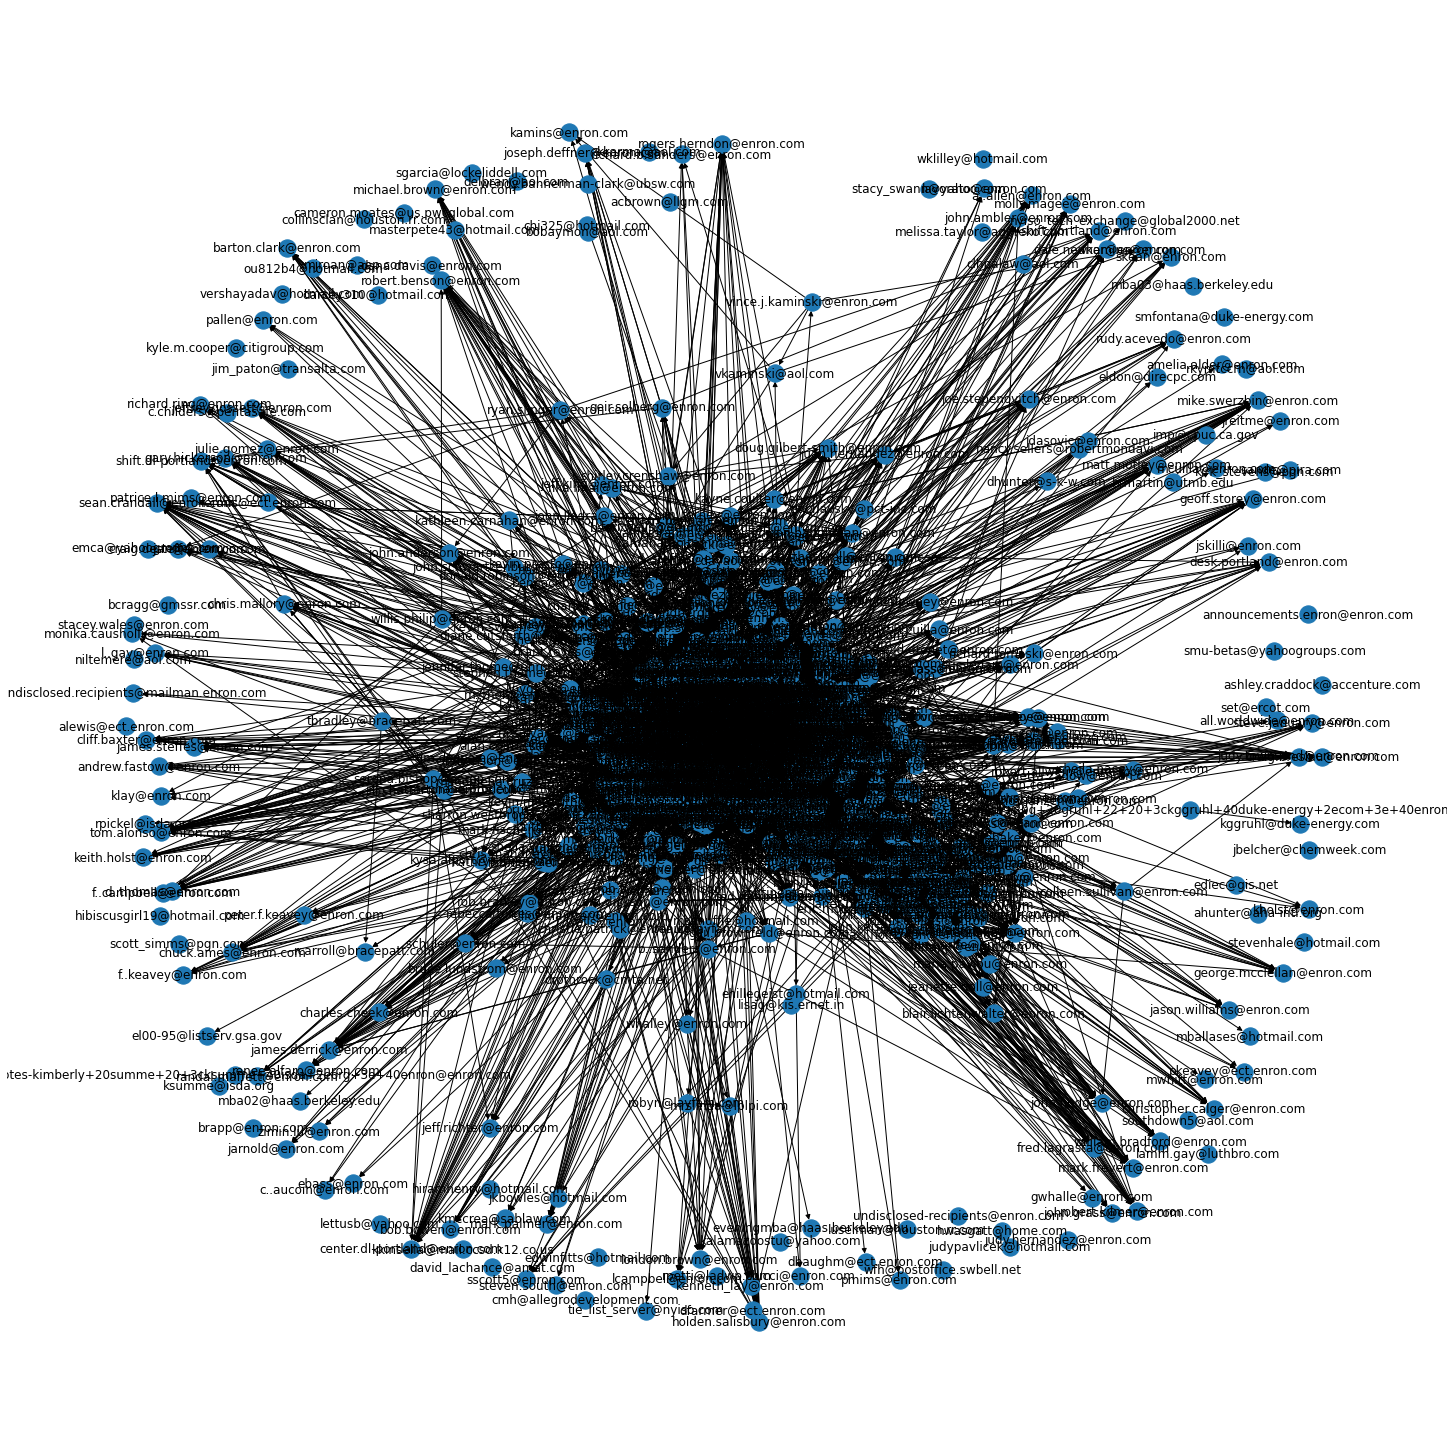

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
l = [n for n,degree in dict(g.degree()).items() if degree > 10]
sub_g = g.subgraph(l)
plt.figure(figsize=(20,20))
nx.draw_spring(sub_g, with_labels=True)